In [7]:
import numpy as np
import pandas as pd
import random
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [15]:
!pip install KMeans

  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11796 sha256=198f7c180307df277a449cd4cc876251c262671b6cae7c20c8d51410943e6171
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built KMeans


In [9]:
df_=pd.read_csv("top10s.csv", encoding = 'unicode_escape')
df_.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
"""
Variables description:

title: Song's title
artist: Song's artist
top genre: the genre of the track
year: Song's year in the Billboard
bpm: Beats.Per.Minute - The tempo of the song.
nrgyEnergy: The energy of a song - the higher the value, the more energtic. song
dnce: Danceability - The higher the value, the easier it is to dance to this song.
dBLoudness..dB..: The higher the value, the louder the song
live: Liveness - The higher the value, the more likely the song is a live recording
val: Valence - The higher the value, the more positive mood for the song.
dur: Length - The duration of the song.
acous: Acousticness.. - The higher the value the more acoustic the song is.
spch: Speechiness - The higher the value the more spoken word the song contains.
pop: Popularity- The higher the value the more popular the song is.
"""

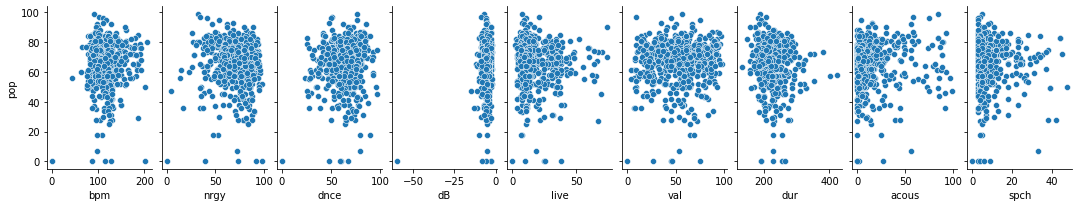

In [10]:
g = sns.pairplot(df_, y_vars="pop", x_vars=['bpm', 'nrgy', 'dnce', 'dB','live', 'val', 'dur', 'acous', 'spch'])
g.fig.set_figheight(3)
g.fig.set_figwidth(15)

In [11]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     

In [12]:
features = ['top genre', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
df = df_[features]
df=df.apply(string_to_int.fit_transform)
df.head()

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,46,27,68,42,11,7,75,56,19,2,58
1,27,17,72,50,10,48,59,102,24,20,57
2,25,50,63,51,12,28,66,39,10,12,55
3,25,49,71,45,11,7,66,126,0,2,54
4,48,39,63,39,10,8,38,60,2,2,53


In [13]:
df


,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,46,27,68,42,11,7,75,56,19,2,58
1,27,17,72,50,10,48,59,102,24,20,57
2,25,50,63,51,12,28,66,39,10,12,55
3,25,49,71,45,11,7,66,126,0,2,54
4,48,39,63,39,10,8,38,60,2,2,53
...,...,...,...,...,...,...,...,...,...,...,...
598,25,34,45,36,8,19,11,15,1,1,50
599,48,25,58,50,9,6,56,45,21,10,50
600,25,66,55,28,10,8,60,99,7,30,45
601,25,44,58,35,9,40,19,56,1,5,44


In [20]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [17]:
kmeans = KMeans(n_clusters=7, random_state=0)
df['cluster'] = kmeans.fit_predict(df)
# get centroids
centroids = kmeans.cluster_centers_
centroids

array([[ 24.95867769,  49.33884298,  55.80165289,  47.94214876,
         10.20661157,  16.72727273,  69.79338843,  34.40495868,
          7.1322314 ,   6.28099174,  41.09090909],
       [ 26.95238095,  27.65079365,  50.27777778,  40.87301587,
          9.57936508,  14.00793651,  42.49206349,  48.84126984,
         10.02380952,   6.36507937,  44.42857143],
       [ 27.41463415,  57.99186992,  58.1300813 ,  43.82926829,
          9.95934959,  17.43089431,  62.52845528,  72.34146341,
          7.64227642,   6.1300813 ,  39.56097561],
       [ 22.16666667,  42.96666667,  19.5       ,  18.73333333,
          7.26666667,  12.16666667,  15.86666667, 104.        ,
         50.43333333,   2.1       ,  34.2       ],
       [ 30.07894737,  37.52631579,  24.97368421,  37.15789474,
          7.84210526,  12.86842105,  36.15789474,  52.97368421,
         53.05263158,   5.55263158,  48.36842105],
       [ 24.35      ,  40.0125    ,  48.125     ,  37.25      ,
          9.1375    ,  19.7       ,  33.6

In [18]:
cen_0 = [i[0] for i in centroids] 
cen_1 = [i[1] for i in centroids]
cen_2 = [i[2] for i in centroids]
cen_3 = [i[3] for i in centroids]
cen_4 = [i[4] for i in centroids]
cen_5 = [i[5] for i in centroids]
cen_6 = [i[6] for i in centroids]

## add to df
df['cen_0'] = df.cluster.map({0:cen_0[0], 1:cen_0[1], 2:cen_0[2], 3:cen_0[3], 4:cen_0[4], 5:cen_0[5], 6:cen_0[6]})
df['cen_1'] = df.cluster.map({0:cen_1[0], 1:cen_1[1], 2:cen_1[2], 3:cen_1[3], 4:cen_1[4], 5:cen_1[5], 6:cen_1[6]})
df['cen_2'] = df.cluster.map({0:cen_2[0], 1:cen_2[1], 2:cen_2[2], 3:cen_2[3], 4:cen_2[4], 5:cen_2[5], 6:cen_2[6]})
df['cen_3'] = df.cluster.map({0:cen_3[0], 1:cen_3[1], 2:cen_3[2], 3:cen_3[3], 4:cen_3[4], 5:cen_3[5], 6:cen_3[6]})
df['cen_4'] = df.cluster.map({0:cen_4[0], 1:cen_4[1], 2:cen_4[2], 3:cen_4[3], 4:cen_4[4], 5:cen_4[5], 6:cen_4[6]})
df['cen_5'] = df.cluster.map({0:cen_5[0], 1:cen_5[1], 2:cen_5[2], 3:cen_5[3], 4:cen_5[4], 5:cen_5[5], 6:cen_5[6]})
df['cen_6'] = df.cluster.map({0:cen_6[0], 1:cen_6[1], 2:cen_6[2], 3:cen_6[3], 4:cen_6[4], 5:cen_6[5], 6:cen_6[6]})
# define and map colors
colors = ['#21351d', '#bd60be', '#f5e261', '#3a0892', '#fe1054', '#3627bd', '#ff603f']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6]})

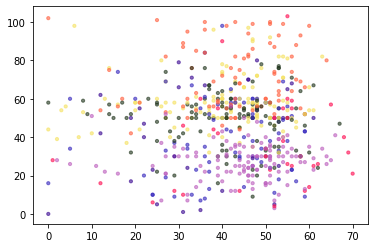

In [21]:
plt.scatter(df['pop'], df.bpm, c=df.c, alpha = 0.6, s=10)

In [23]:
#Recommendation
"""
0 to 6 clusters 
0 being the lightest and happiest mood while 6 being saddest
Change x to change recommendation with different mood
Change y for number of recommendations
"""

x = 4
y = 5
for i in range(y):
    print(df_.loc[df[df.cluster == x].iloc()[i].name].title + " by " + df_.loc[df[df.cluster == x].iloc()[i].name].artist)

Empire State of Mind (Part II) Broken Down by Alicia Keys
Muny - Album Version (Edited) by Nicki Minaj
Just Give Me a Reason (feat. Nate Ruess) by P!nk
Wrecking Ball by Miley Cyrus
Clown by Emeli Sandé
